# Homework 1

Tổng quan: Ở bài tập này chúng ta sẽ thực hành các thao tác xử lý ảnh đơn giản sử dụng ngôn ngữ lập trình Python kết hợp với thư viện Opencv. Nhiệm vụ của bạn là lập trình các hàm thực hiện các công việc: đọc ảnh, biến đổi ảnh, phát hiện cạnh trong ảnh, phân vùng ảnh, trích xuất đặc trưng SIFT.

Requirements:
    - Hệ điều hành Ubuntu: https://www.ubuntu.com/download
    - Ngôn ngữ lập trình: Python 2
    - Các thư viện cần cài đặt: numpy, OpenCV 3, matplotlib, jupyter notebook.
        + Câu lệnh cài các thư viện cơ bản: (sudo) pip install numpy scipy matplotlib ipython jupyter pandas
        + Cài đặt OpenCV 3:
            sudo apt-get install python-opencv
            pip install opencv-contrib-python
            
Hướng dẫn: Các bạn lập trình các hàm trong các file image_basic.py, image_segmentation.py, edge_detection.py, sift_features.py rồi so sánh kết quả chạy với file kết quả mẫu: example_result.html

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

%matplotlib inline

from image_basic_sol import *
from image_segmentation_sol import *
from edge_detection_sol import *
from sift_features_sol import *

## Bài tập 1: Vào ra và biến đổi ảnh đơn giản với OpenCV
Trong bài tập này bạn được yêu cầu lập trình hoàn chỉnh các hàm trong file image_basic.py

### Bài tập 1.1: Đọc và hiển thị ảnh
Hãy lập trình hai hàm: load() và bgr2rgb() trong file image_basic.py. 

Hàm load(img_path) nhận đầu vào là đường dẫn đến ảnh và trả về một mảng numpy miêu tả các pixel của ảnh.

Ngoài ra, ở bài tập này ta sẽ sử dụng thư viện matplotlib để hiển thị ảnh (để tiện cho việc hiển thị trên Jupyter Notebook). Hãy quan sát hàm hiển thị ảnh display(img) phía dưới. Hàm này nhận vào một ảnh img nhưng phải có format là RGB, tuy nhiên ảnh trả về từ hàm load() sử dụng OpenCV lại có format BGR, vì vậy hãy lập trình hàm bgr2rgb() để chuyển ảnh từ BGR về RGB để hiển thị chính xác ảnh.

In [2]:
def display(img):
    plt.imshow(img)
    plt.show()

In [3]:
img_path = './img1.jpg'

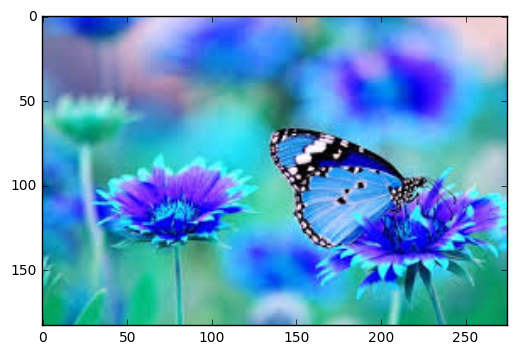

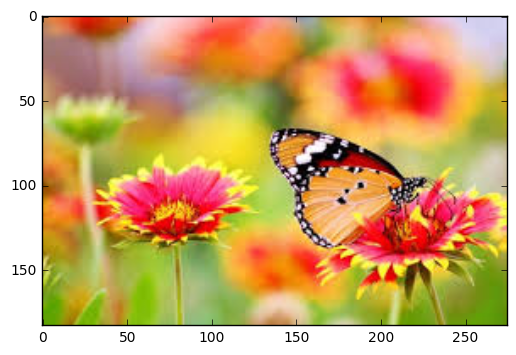

In [4]:
img_bgr = load(img_path)
img_rgb = bgr2rgb(img_bgr)
display(img_bgr)
display(img_rgb)

### Bài tập 1.2: Chuyển ảnh về dạng ảnh xám
Hãy lập trình hàm convert_to_grey_scale() trong file image_basic.py để chuyển ảnh ở dạng BGR về dạng ảnh xám. Lưu ý rằng để hiện thị ảnh xám với matplotlib ta cần thêm tham số cmap vào hàm imshow như sau:

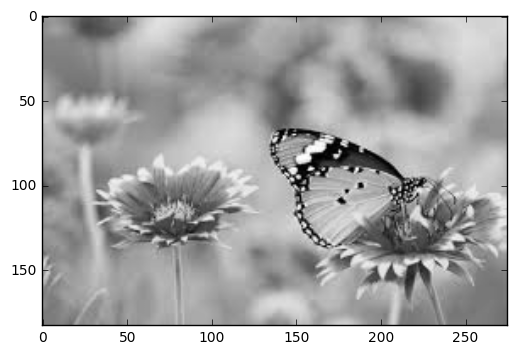

In [5]:
grey = convert_to_grey_scale(img_bgr)
plt.imshow(grey, cmap='gray')
plt.show()

### Bài tập 1.3: Tách các kênh màu 
Hãy lập trình hàm bgr_decomposition(), ở đó từ ảnh gốc ta sẽ loại bỏ đi một kênh màu nào đó. Vẫn lưu ý rằng đầu vào và đầu ra của hàm là ảnh dưới dạng BGR, ta phải chuyển về dạng RGB để hiển thị chính xác với matplotlib.

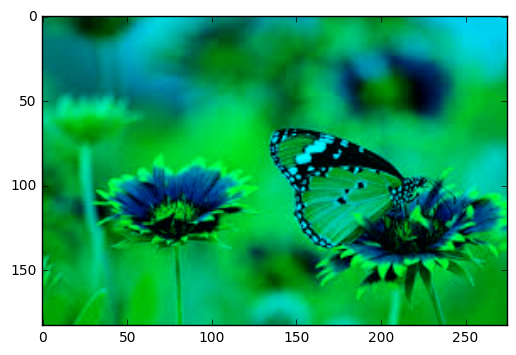

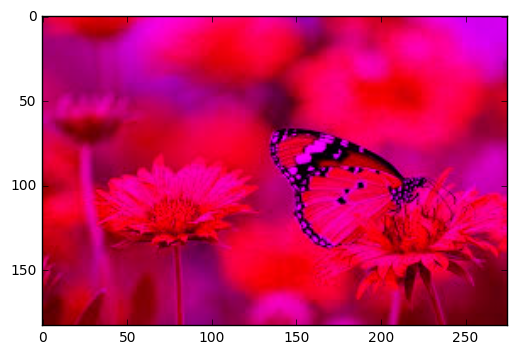

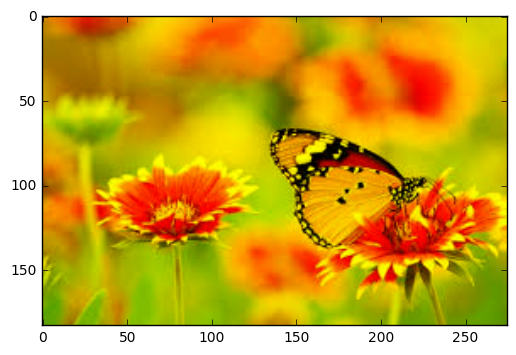

In [6]:
without_red = bgr_decomposition(img_bgr, 'R')
without_blue = bgr_decomposition(img_bgr, 'B')
without_green = bgr_decomposition(img_bgr, 'G')

without_red_rgb = bgr2rgb(without_red)
without_green_rgb = bgr2rgb(without_green)
without_blue_rgb = bgr2rgb(without_blue)

display(without_red_rgb)
display(without_green_rgb)
display(without_blue_rgb)

### Bài tập 1.4
Hãy lập trình hàm convert_to_hsv() để chuyển một ảnh từ dạng BGR sang HSV.

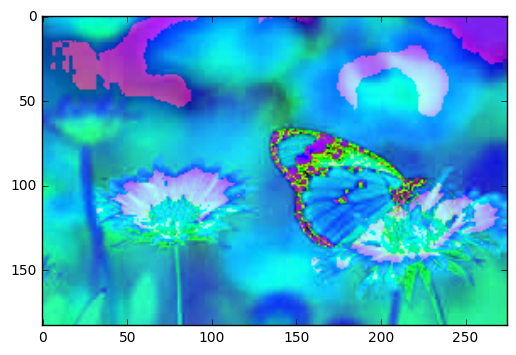

In [7]:
hsv_img = convert_to_hsv(img_bgr)
display(hsv_img)

## Bài tập 2: Phát hiện cạnh: Edge detection
Trong bài tập này bạn được yêu cầu lập trình hoàn chỉnh các hàm trong file edge_detection.py

### Bài tập 2.1: Phát hiện cạnh sử dụng bộ lọc Sobel
Hãy lập trình hàm sobel_edge_detection() trong file edge_detection.py để sử dụng bộ lọc Sobel cho một ảnh xám.

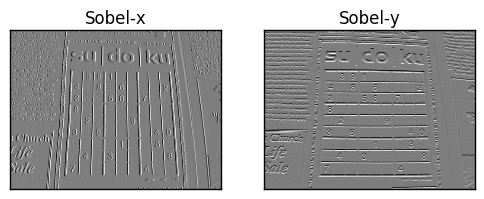

In [8]:
sudoku = load('./sudoku.jpg')
grey_sudoku = convert_to_grey_scale(sudoku)

sobelx = sobel_edge_detection(grey_sudoku, direction = 1, ksize = 3)
sobely = sobel_edge_detection(grey_sudoku, direction = 0, ksize = 3)

plt.subplot(1, 2, 1), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel-x'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(sobely, cmap='gray')
plt.title('Sobel-y'), plt.xticks([]), plt.yticks([])

plt.show()

### Bài tập 2.2: Phát hiện cạnh sử dụng Canny edge detection
Hãy lập trình hàm canny_edge_detection() trong file edge_detection.py để áp dụng thuật toán phát hiện cạnh Canny cho một ảnh xám.

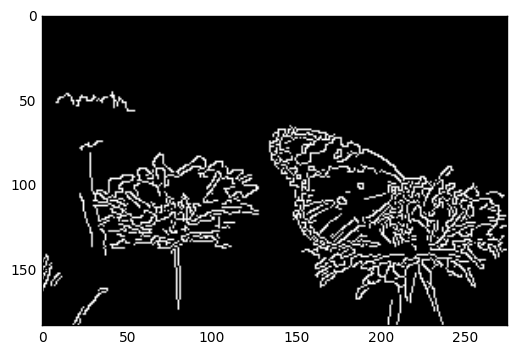

In [9]:
canny_edge = canny_edge_detection(grey, thresh1 = 100, thresh2 = 200, ksize = 3)
plt.imshow(canny_edge, cmap='gray')
plt.show()

### Bài tập 2.3: Phát hiện đường thẳng sử dụng Hough Line và Probabilistic Hough Line 
Hãy lập trình hàm line_detection() trong file edge_detection.py để thực hiện thuật toán phát hiện đường thẳng trên một ảnh nhị phân cho trước. Do đầu vào của hàm là ảnh nhị phân, vì vậy trước tiên ta sẽ sử dụng thuật toán Canny để phát hiện các cạnh trong ảnh ban đầu, từ đó đưa vào hàm line_detection.

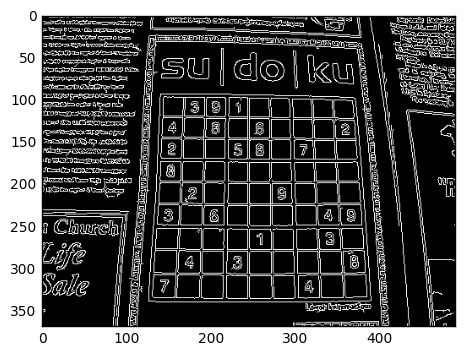

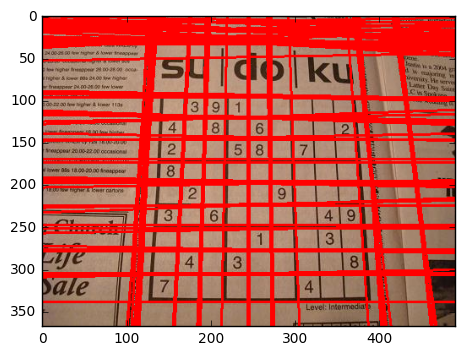

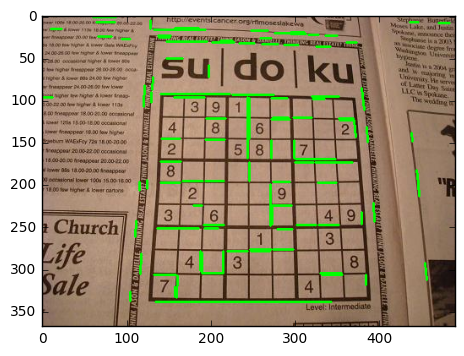

In [10]:
sudoku_canny = canny_edge_detection(grey_sudoku, thresh1 = 50, thresh2 = 150, ksize = 3)
plt.imshow(sudoku_canny, cmap='gray')
plt.show()

# Hough Line
lines1 = line_detection(sudoku_canny, 1, np.pi/180, 150)

sudoku_copy = sudoku.copy()

for i in range(lines1.shape[0]):
    rho,theta = lines1[i][0][0], lines1[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(sudoku_copy,(x1,y1),(x2,y2),(0,0,255),2)

sudoku_copy = bgr2rgb(sudoku_copy)
display(sudoku_copy)

# Probabilistic Hough Line

lines2 = line_detection(sudoku_canny, 1, np.pi/180, 150, 100, 10)
sudoku_copy = sudoku.copy()

for i in range(lines2.shape[0]):
    x1,y1,x2,y2 = lines2[i][0][0], lines2[i][0][1], lines2[i][0][2], lines2[i][0][3]
    cv2.line(sudoku_copy,(x1,y1),(x2,y2),(0,255,0),2)
sudoku_copy = bgr2rgb(sudoku_copy)
display(sudoku_copy)


### Bài tập 2.4: Phát hiện đường tròn sử dụng Hough Circle
Tương tự như bài tập 2.3, hãy lập trình hàm circle_detection() để thực hiện thuật toán phát hiện đường tròn, hàm nhận vào một ảnh xám và trả về danh sách các đường tròn phát hiện được, đặc trưng bởi 3 tham số (x, y, r), trong đó (x, y) là tọa độ tâm và r là bán kính.

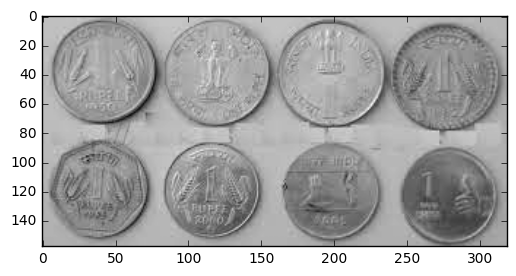

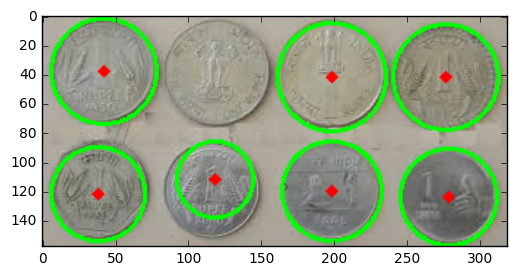

In [11]:
coin_image = load('./coin.jpg')
coin_grey = convert_to_grey_scale(coin_image)
plt.imshow(coin_grey, 'gray')
plt.show()

circles = circle_detection(coin_grey, min_dist=30, param1=150, param2=60, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))

coin_copy = coin_image.copy()

for i in circles[0,:]:
   # draw the outer circle
   cv2.circle(coin_copy,(i[0],i[1]),i[2],(0,255,0),2)
   # draw the center of the circle
   cv2.circle(coin_copy,(i[0],i[1]),2,(0,0,255),3)
coin_copy = bgr2rgb(coin_copy)
display(coin_copy)

## Bài tập 3: Phân vùng ảnh: Image segmentation
Trong bài tập này bạn được yêu cầu lập trình hoàn chỉnh các hàm trong file image_segmentation.py.

### Bài tập 3.1: Phân vùng ảnh sử dụng ngưỡng (threshold)
Bài tập này chủ yếu giúp bạn nhớ được 5 loại phân vùng ảnh sử dụng ngưỡng thường được sử dụng trong thư viện OpenCV.

Trước hết, chúng ta cùng quan sát một ví dụ về một hàm ngưỡng đơn giản như sau:

\begin{align}{dst(x,y) = }
    \begin{cases}
        maxval & if src(x, y) > thresh \\
        0 & otherwise
    \end{cases}
\end{align}

Để thực hiện phân vùng ảnh sử dụng ngưỡng như công thức trên, ta sử dụng OpenCV như sau:

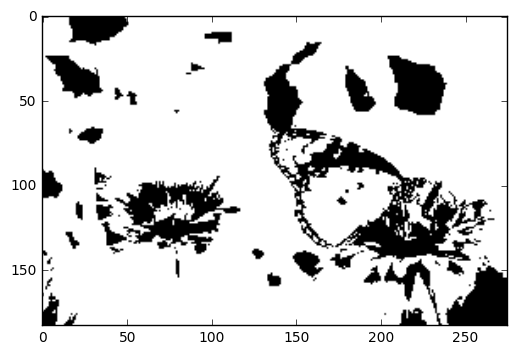

In [12]:
ret, thresh1 = cv2.threshold(grey,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')
plt.show()

Tương tự như trên, bạn hãy sử dụng OpenCV để lập trình các cách phân vùng ảnh sử dụng ngưỡng sau:

\begin{align}{dst(x,y) = }
    \begin{cases}
        0 & if src(x, y) > thresh \\
        maxval & otherwise
    \end{cases}
\end{align}

In [13]:
### YOUR CODE HERE ###


### END YOUR CODE ####

\begin{align}{dst(x,y) = }
    \begin{cases}
        threshold & if src(x, y) > thresh \\
        src(x, y) & otherwise
    \end{cases}
\end{align}

In [14]:
### YOUR CODE HERE ###


### END YOUR CODE ####

\begin{align}{dst(x,y) = }
    \begin{cases}
        src(x, y) & if src(x, y) > thresh \\
        0 & otherwise
    \end{cases}
\end{align}

In [15]:
### YOUR CODE HERE ###


### END YOUR CODE ####

\begin{align}{dst(x,y) = }
    \begin{cases}
        0 & if src(x, y) > thresh \\
        src(x, y) & otherwise
    \end{cases}
\end{align}

In [16]:
### YOUR CODE HERE ###


### END YOUR CODE ####

### Bài tập 3.2: Phân vùng ảnh sử dụng KMeans 
Hãy lập trình hàm kmeans_segmentation() trong file image_segmentation.py theo hướng dẫn để thực hiện thuật toán phân vùng ảnh sử dụng KMeans clustering:

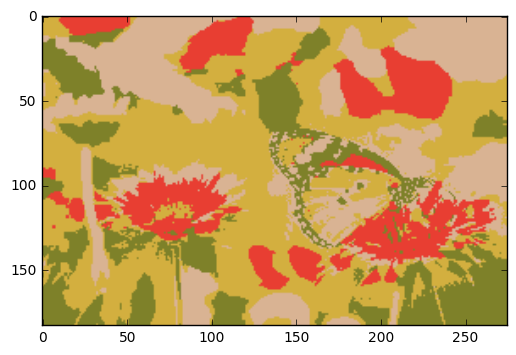

In [17]:
kmeans_seg_bgr = kmeans_segmentation(img_bgr, num_clusters=4, max_iter=10, expected_acc=0.9, attempts=10)
kmeans_seg_rgb = bgr2rgb(kmeans_seg_bgr)
display(kmeans_seg_rgb)

## Bài tập 4: Trích xuất đặc trưng SIFT
Trong bài tập này, bạn được yêu cầu lập trình hoàn chỉnh các hàm trong file sift_features.py để nắm vững kiến thức và thành thạo phương pháp trích xuất đặc trưng SIFT bằng OpenCV

### Bài tập 4.1: Trích xuất đặc trưng SIFT 
Lưu ý rằng, các bài tập được lập trình bằng OpenCV3, OpenCV3 có đôi chút khác biệt so với OpenCV2 ở gói lệnh SIFT. Để có thể sử dụng SIFT với OpenCV3, ta cần cài đặt package opencv-contrib-python:

pip install opencv-contrib-python

Hãy hoàn thiện hàm sift_extract() trong file sift_features.py để trích xuất đặc trưng SIFT của ảnh theo đoạn mã dưới đây:

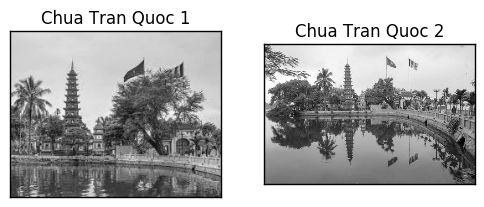

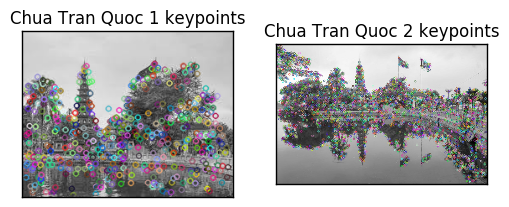

In [18]:
ctq1_img = load('./ctq1.jpg')
ctq2_img = load('./ctq2.jpg')

ctq1_gray = convert_to_grey_scale(ctq1_img)
ctq2_gray = convert_to_grey_scale(ctq2_img)

plt.subplot(1, 2, 1), plt.imshow(ctq1_gray, cmap='gray')
plt.title('Chua Tran Quoc 1'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(ctq2_gray, cmap='gray')
plt.title('Chua Tran Quoc 2'), plt.xticks([]), plt.yticks([])

plt.show()

ctq1_keypoints = sift_extract(ctq1_gray)
ctq2_keypoints = sift_extract(ctq2_gray)

plt.subplot(1, 2, 1), plt.imshow(ctq1_keypoints, cmap='gray')
plt.title('Chua Tran Quoc 1 keypoints'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(ctq2_keypoints, cmap='gray')
plt.title('Chua Tran Quoc 2 keypoints'), plt.xticks([]), plt.yticks([])

plt.show()


### Bài tập 4.2: Matching đặc trưng SIFT trên hai ảnh
Hãy lập trình hoàn chỉnh hàm sift_matching() để matching đặc trưng SIFT trên hai ảnh theo đoạn chương trình dưới đây:

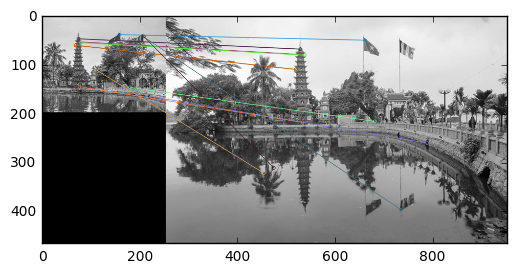

In [19]:
img_matching = sift_matching(ctq1_gray, ctq2_gray)
display(img_matching)